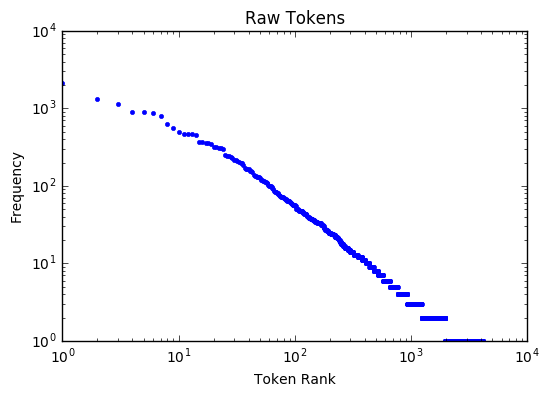

[('the', 2152), ('and', 1323), ('to', 1139), ('a', 902), ('was', 897), ('he', 864), ('of', 809), ('in', 623), ('that', 551), ('had', 498), ('she', 465), ('they', 463), ('it', 463), ('his', 455), ('but', 373), ('not', 365), ('her', 361), ('for', 355), ('you', 351), ('is', 316)]


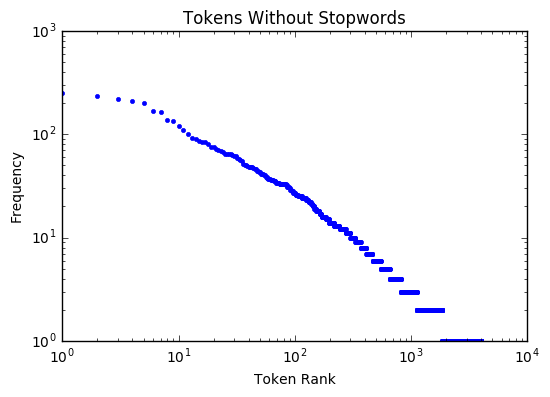

[('I', 253), ('Peter', 234), ('said', 218), ('would', 209), ('Wendy', 199), ('one', 168), ('He', 163), ('could', 138), ('The', 135), ('It', 119), ('She', 109), ('They', 101), ('Darling', 93), ('little', 91), ('like', 86), ('see', 84), ('Hook', 84), ('time', 81), ('John', 76), ('children', 75)]


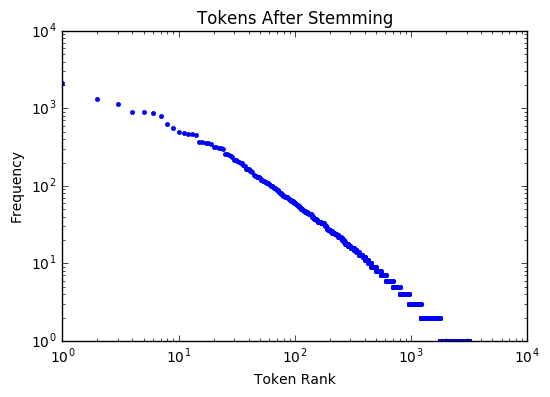

[('the', 2152), ('and', 1323), ('to', 1139), ('a', 902), ('wa', 897), ('he', 864), ('of', 809), ('in', 623), ('that', 551), ('had', 498), ('it', 487), ('she', 465), ('they', 463), ('hi', 455), ('but', 374), ('not', 365), ('her', 362), ('for', 355), ('you', 351), ('is', 316)]


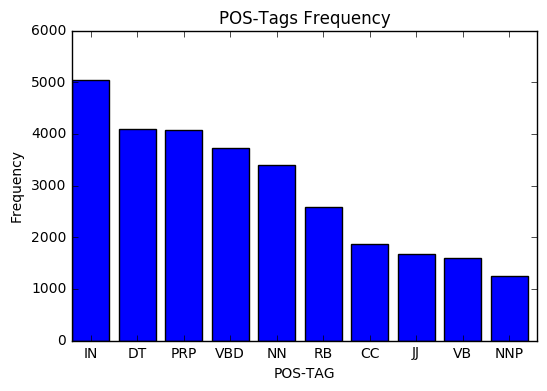

[('IN', 5037), ('DT', 4094), ('PRP', 4070), ('VBD', 3727), ('NN', 3406), ('RB', 2579), ('CC', 1864), ('JJ', 1679), ('VB', 1598), ('NNP', 1249)]


In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tag.perceptron import PerceptronTagger
import numpy as np

stop_words = stopwords.words('english')
stemmer = PorterStemmer()
tagger = PerceptronTagger()


def get_txt(filepath: str) -> str:
    with open(filepath, 'r', encoding='utf8') as f:
        return f.read()


def get_tokens_or_pos_freq(txt: str, remove_stop: bool, stem: bool, pos_wanted: bool) -> Counter:
    """
    return counter contains the frequency of words\pos in a given text
    """
    count = Counter()
    if remove_stop:
        txt = ' '.join([word for word in pp_txt.split() if word not in stop_words])
    if stem:
        txt = ' '.join([stemmer.stem(word) for word in pp_txt.split()])

    sents = sent_tokenize(txt)  # word_tokenize works best for sentences
    for sent in sents:
        sent = ' '.join([word for word in sent.split() if word.isalnum()])  # just clean non-alphanumeric
        if len(sent):
            toks = word_tokenize(sent)
            if pos_wanted:
                poss = [p[1] for p in tagger.tag(toks)]
                count.update(poss)
            else:
                count.update(toks)
    return count


def plot_freq(freq: Counter, title: str, is_pos: bool) -> None:
    """
    plot and save the graph of frequency word as function of their rank
    """
    plt.figure()
    plt.title(title)
    if is_pos:
        pos_names = [p[0] for p in freq]
        vals = [p[1] for p in freq]
        plt.bar(range(len(pos_names)), vals)
        plt.xticks(np.arange(0.4, len(pos_names)+0.4), pos_names)

    else:
        plt.loglog(range(1, len(freq) + 1),  sorted(list(freq.values()), reverse=True), 'b.')
    plt.ylabel('Frequency')
    plt.xlabel('Token Rank') if not is_pos else plt.xlabel('POS-TAG')
    plt.savefig(title + '.jpg')
    plt.show()


pp_txt = get_txt('pp.txt')
# # article b:
raw_freq = get_tokens_or_pos_freq(pp_txt, False, False, False)
plot_freq(raw_freq, 'Raw Tokens', False)
print(raw_freq.most_common(20))


# # article c:
freq_without_stops = get_tokens_or_pos_freq(pp_txt, True, False, False)
plot_freq(freq_without_stops, 'Tokens Without Stopwords', False)
print(freq_without_stops.most_common(20))


# # article d:
freq_after_stemming = get_tokens_or_pos_freq(pp_txt, False, True, False)
plot_freq(freq_after_stemming, 'Tokens After Stemming', False)
print(freq_after_stemming.most_common(20))


# # article e:
pos_freq = get_tokens_or_pos_freq(pp_txt, False, False, True)
plot_freq(pos_freq.most_common(10), 'POS-Tags Frequency', True)
print(pos_freq.most_common(10))